# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fiyanda Ma'muri
- **Email:** fiyandamamuri@gmail.com
- **ID Dicoding:** fiyandamamuri

## Menentukan Pertanyaan Bisnis

- Apakah musim mempengaruhi penggunaan sepeda?
- Bagaimana cuaca mempengaruhi penggunaan sepeda?
- Bagaimana pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan?
- Apakah terdapat tren jangka panjang dalam jumlah pengguna terdaftar dan kasual?
- Apakah ada pola penggunaan sepeda yang berbeda antara hari libur dan hari kerja biasa?
- bagaimana pola tren penggunaan sepeda pada tiap quartalnya?

## Import Semua Packages/Library yang Digunakan

mengimport library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

gathering data adalah melakukan import data yang akan dianalisis. disini saya mengimport datasets yang ada pada github

In [3]:
!git clone https://github.com/fiyandamamuri/Data-Analysis.git

Cloning into 'Data-Analysis'...


saya hanya menggunakan datasets day_csv untuk dilakukan analisis, untuk memanggil data tersebut saya menggunakan pandas untuk membaca data dalam bentuk dataframe.

In [4]:
day_df = 'Data-Analysis\Bike-sharing-dataset\day.csv'
day_df = pd.read_csv(day_df)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

Mengevaluasi data untuk memastikan kualitas dan relevansinya sebelum analisis dilakukan. Ini termasuk memeriksa kekompletan, keakuratan, dan integritas data untuk memastikan kecocokannya dengan tujuan analisis.

mennggunakan `day_df.info()` untuk melihat informasi pada data seperti banyaknya coloums dan jenis tipe datanya

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


menggunakan `day_df.isnull().sum()` untuk melihat jumlah data yang menggandung missing values di setiap kolom

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

menggunakan `day_df.duplicated().sum()` untuk melihat jumlah data yang duplicated

In [7]:
day_df.duplicated().sum()

0

setelah dilakukan tahap asessing data diatas telihat bahwa data kita tidak terdapat missing values maupun duplicated, namun terdapat tipe data yang tidak esuai pada kolom dteday, selanjutnya saya akan memperbaiki masalah tersebut pada tahap cleaning data

### Cleaning Data

memperbaiki tipe data `dteday` yang sebelumnya object menjadi datetime 

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

setelah dicek kembali, Dtype sudah aman, langkah selanjutnya yaitu mengeksplor data untuk memahami karakteristik atau aspek penting dalam data

## Exploratory Data Analysis (EDA)

### bivariate analysis

#### rata-rata penggunaan sepeda berdasarkan cuaca

In [11]:
weather_labels = {
    1: 'clear',
    2: 'misty',
    3: 'light rain',
    4: 'heavy rain'
}

day_df['weather_label'] = day_df['weathersit'].map(weather_labels)

In [12]:
day_df.groupby('weather_label')['cnt'].mean().reset_index().sort_values("cnt")

,weather_label,cnt
1,light rain,1803.285714
2,misty,4035.862348
0,clear,4876.786177


terlihat bahwa pada penggunaan sepeda terbanyak yaitu di cuaca cerah

#### rata-rata penggunaan sepeda berdasarkan musim

In [26]:
season_labels = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter',
}

day_df['season_label'] = day_df['season'].map(season_labels)

In [29]:
#rata-rata pengguaan sepeda berdasarkan musim
day_df.groupby('season_label')['cnt'].mean().reset_index().sort_values("cnt")

,season_label,cnt
1,springer,2604.132597
3,winter,4728.162921
2,summer,4992.331522
0,fall,5644.303191


rata-rata pengguna sepeda terbanyak yaitu pada musim gugur

#### perbandingan user casual dengan registered

In [21]:
total_casual_users = day_df['casual'].sum()
total_registered_users = day_df['registered'].sum()

data = {'User Type': ['Casual', 'Registered'],
        'Total Users': [total_casual_users, total_registered_users]}
user_type_df = pd.DataFrame(data)
print("perbandingan jumlah penggunaan sepeda antara user casual dengan registered")
print(user_type_df)

perbandingan jumlah penggunaan sepeda antara user casual dengan registered
    User Type  Total Users
0      Casual       620017
1  Registered      2672662


jumlah pengguna yang registered lebih banyak daripadda pengguna casual.

#### perbandingan jumlah pengguna saat holiday, working day, dan weekday

In [16]:
# Menghitung jumlah pengguna saat holiday, workingday, dan weekday
total_holiday_users = day_df.loc[day_df['holiday'] == 1, 'cnt'].sum()
total_workingday_users = day_df.loc[day_df['workingday'] == 1, 'cnt'].sum()
total_weekday_users = day_df.loc[(day_df['holiday'] == 0) & (day_df['workingday'] == 0), 'cnt'].sum()

# Membuat DataFrame
data = {'Day Type': ['Holiday', 'Working Day', 'Weekday'],
        'Total Users': [total_holiday_users, total_workingday_users, total_weekday_users]}
day_type_df = pd.DataFrame(data)

# Menampilkan DataFrame
print("Jumlah Pengguna Berdasarkan Hari:")
print(day_type_df)

Jumlah Pengguna Berdasarkan Hari:
      Day Type  Total Users
0      Holiday        78435
1  Working Day      2292410
2      Weekday       921834


jumlah penggunaan sepeda terbanyak adalah saat working day

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana strategi yang tepat untuk meningkatkan jumlah penggunaan sepeda berdasarkan musim ?

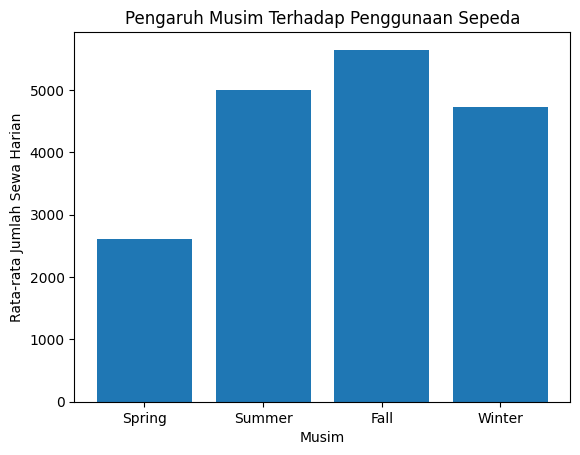

In [33]:
seasonal_data = day_df.groupby('season')['cnt'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, seasonal_data)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Penggunaan Sepeda')
plt.show()

### Pertanyaan 6:
bagaimana pola tren penggunaan sepeda pada tiap quartalnya?

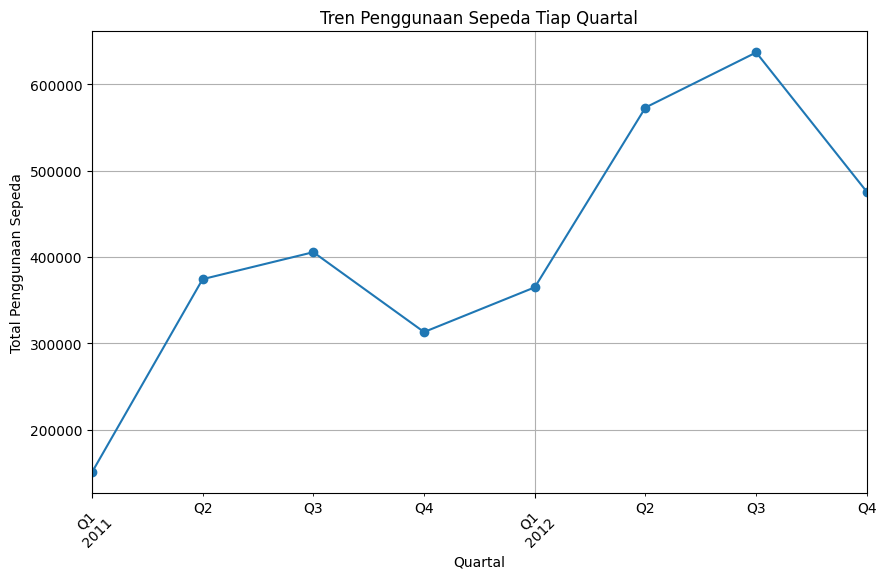

In [49]:
# mengelompokkan data ke dalam interval quartal
day_df['quarter'] = day_df['dteday'].dt.to_period('Q')

# menghitung total penggunaan sepeda untuk setiap quartal
quarterly_usage = day_df.groupby('quarter')['cnt'].sum()

# Plotting
plt.figure(figsize=(10, 6))
quarterly_usage.plot(marker='o', linestyle='-')
plt.title('Tren Penggunaan Sepeda Tiap Quartal')
plt.xlabel('Quartal')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : setelah dilakukan analisis jumlah keseluruhan penyewa sepeda di tiap musim, terlihat bahwa di musim gugur memiliki jumlah penyewa yang terbanyak. strategi perusahaan untuk memperoleh keuntungan lebih dengan melihat kondisi di tiap musim yaitu salah satunya mengutamakan dan mmemperbanyak persediaan dan pelayanan sepeda di musim gugur diikuti dengan musim panas dan musim dingin, dan mengurangi persediaan di musim semi.